In [7]:
import pandas as pd
import numpy as np

In [8]:
train = pd.read_csv("../data/development/train.csv")
test = pd.read_csv("../data/development/test.csv")

In [9]:
train.head()

,Unnamed: 0,LGA_NAME,LGA_CODE,name,geometry,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,0,Alpine,20110,34 O'Donnell Avenue Myrtleford VIC 3737,POINT (146.7271339 -36.5522656),270,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000,2017,396,13113.0,592.342001
1,1,Ararat,20260,4 Grano Street Ararat VIC 3377,POINT (142.9414137 -37.2818641),260,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000,2017,1249,11613.0,579.692855
2,2,Ballarat,20570,3/41 Longley Street Alfredton VIC 3350,POINT (143.8376317 -37.5653948),280,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000,2017,11885,152520.0,617.844766
3,3,Banyule,20660,3 Clinton Street Heidelberg Heights VIC 3081,POINT (145.0598679 -37.7598674),395,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140,2017,9703,129192.0,762.060273
4,4,Bass Coast,20740,23 Carpathia Street Coronet Bay VIC 3984,POINT (145.4968004 -38.4790177),285,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675,2017,2613,34166.0,528.836271


In [10]:
train_df = train.drop(columns=['Unnamed: 0', 'name', 'geometry', 'LGA_CODE'])
test_df = test.drop(columns=['Unnamed: 0', 'name', 'geometry', 'LGA_CODE'])

In [11]:
if train_df.isnull().any().any():
    print("The DataFrame has null values.")
else:
    print("The DataFrame does not have any null values.")

# To see which columns have null values
null_columns = train_df.columns[train_df.isnull().any()]
print("Columns with null values:", null_columns)

# To see the count of null values in each column
null_counts = train_df[null_columns].isnull().sum()
print("\nCount of null values in each column:")
print(null_counts)

The DataFrame has null values.
Columns with null values: Index(['population'], dtype='object')

Count of null values in each column:
population    7
dtype: int64


In [12]:
rows_with_null = train_df[train_df.isnull().any(axis=1)]

# Print the rows with null values
rows_with_null

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
60,Queenscliffe,360,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2017,152,NaN,700.827647
139,Queenscliffe,320,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2018,115,NaN,731.981209
218,Queenscliffe,375,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2019,321,NaN,764.519626
297,Queenscliffe,350,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2020,120,NaN,798.504457
376,Queenscliffe,-,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2021,104,NaN,834.000000
455,Queenscliffe,410,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2022,137,NaN,871.073410
534,Queenscliffe,420.0,2.0,1.0,1.0,34.58,79.336667,19.263333,74.481667,1.67,4.243333,96.275,2023,56,NaN,909.794826


In [14]:
# List of LGA_NAME23 values to remove
remove_list = [
    "Queenscliffe"
]

# Remove rows with LGA_NAME23 in remove_list from train_df
train_df = train_df[~train_df['LGA_NAME'].isin(remove_list)]

# Remove rows with LGA_NAME23 in remove_list from test_df (if needed)
test_df = test_df[~test_df['LGA_NAME'].isin(remove_list)]


In [15]:
train_df

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,270,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2017,396,13113.0,592.342001
1,Ararat,260,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2017,1249,11613.0,579.692855
2,Ballarat,280,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2017,11885,152520.0,617.844766
3,Banyule,395,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2017,9703,129192.0,762.060273
4,Bass Coast,285,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2017,2613,34166.0,528.836271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Wodonga,450.0,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2023,3750,74233.0,864.271663
549,Wyndham,480.0,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2023,18155,685662.0,909.893404
550,Yarra,650.0,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2023,13415,153858.0,1458.804049
551,Yarra Ranges,530.0,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2023,7130,166556.0,872.419916


In [17]:
train_df.dtypes

LGA_NAME                object
cost                    object
beds                   float64
baths                  float64
parkings               float64
Nearest_station        float64
Nearest_park           float64
Nearest_shop           float64
Nearest_hospital       float64
Nearest_school         float64
Nearest_supermarket    float64
distance_to_cbd        float64
year                     int64
Offence Count            int64
population             float64
weekly_income          float64
dtype: object

In [20]:
filtered_df = train_df[train_df['cost'] == '-']
filtered_df

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
229,West Wimmera,-,1.0,1.0,0.0,78.161667,999.0,76.206667,98.705,1.476667,0.196667,999.0,2019,160,2702.0,639.027371


In [21]:
average_cost = train_df[(train_df['LGA_NAME'] == 'West Wimmera') & (train_df['year'].isin([2018, 2020]))]['cost'].astype(float).mean()

In [23]:
train_df.loc[(train_df['LGA_NAME'] == 'West Wimmera') & (train_df['year'] == 2019), 'cost'] = average_cost

# Feature Selection

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming you've loaded your dataframe as df
# One-hot encoding
df_encoded = pd.get_dummies(train_df, columns=['LGA_NAME'], drop_first=True)

# Log transformation for numerical columns (excluding 'cost' and year as you might not want to log-transform year)
numerical_cols = ['Nearest_station', 'Nearest_park', 'Nearest_shop', 'Nearest_hospital', 'Nearest_school', 'Nearest_supermarket', 'distance_to_cbd', 'Offence Count', 'population', 'weekly_income']

for col in numerical_cols:
    df_encoded[col] = np.log1p(df_encoded[col])

def forward_selection(data, target):
    null_X = pd.DataFrame(sm.add_constant(data.iloc[:, 0]))  # Using the first column as an initial column.
    y = target.copy()
    all_candidates = data.columns.tolist()
    
    AIC_dict = {}
    null_model = sm.OLS(y, null_X).fit()
    last_min = null_model.aic
    candidates = []

    while True:
        AIC_dict = {}
        for x in all_candidates:
            print(f"Trying feature {x}")
            
            forward_X = pd.concat([data[x], null_X], axis=1)
            model = sm.OLS(y, forward_X).fit()
            
            AIC_dict[x] = model.aic
            print(f"AIC = {model.aic}")

        min_aic = min(AIC_dict.values())
        min_aic_key = min(AIC_dict, key=AIC_dict.get)

        if min_aic < last_min:
            candidates.append(min_aic_key)
            all_candidates.remove(min_aic_key)
            last_min = min_aic
            null_X = pd.concat([data[min_aic_key], null_X], axis=1)

            print(f'Step: {len(candidates)}')
            print(candidates)
            print(f'New AIC: {min_aic}')
            print('===============')
        else:
            final_model = sm.OLS(y, null_X).fit()
            print(final_model.summary())
            break

    return candidates


# Forward selection
X_encoded = df_encoded.drop(['cost'], axis=1)

y = df_encoded['cost']
y = y.astype("float")
selected_features = forward_selection(X_encoded, y)
print(selected_features)



Trying feature beds
AIC = 6506.148993228011
Trying feature baths
AIC = 6438.388782343059
Trying feature parkings
AIC = 6504.26878056694
Trying feature Nearest_station
AIC = 6438.333036976214
Trying feature Nearest_park
AIC = 6399.199257064839
Trying feature Nearest_shop
AIC = 6431.378613914694
Trying feature Nearest_hospital
AIC = 6378.145134289424
Trying feature Nearest_school
AIC = 6507.99332155896
Trying feature Nearest_supermarket
AIC = 6474.7842032585595
Trying feature distance_to_cbd
AIC = 6174.316347672641
Trying feature year
AIC = 6388.789518166839
Trying feature Offence Count
AIC = 6354.2018458585435
Trying feature population
AIC = 6270.731327977174
Trying feature weekly_income
AIC = 5981.317009442646
Trying feature LGA_NAME_Ararat
AIC = 6504.156399083129
Trying feature LGA_NAME_Ballarat
AIC = 6507.118115706934
Trying feature LGA_NAME_Banyule
AIC = 6505.720096700724
Trying feature LGA_NAME_Bass Coast
AIC = 6507.9523763310335
Trying feature LGA_NAME_Baw Baw
AIC = 6508.139697703

In [25]:
test_df

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,NaN,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2024,NaN,13547.0,855.905888
1,Ararat,NaN,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2024,NaN,11884.0,776.354437
2,Ballarat,NaN,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2024,NaN,169198.0,853.239387
3,Banyule,NaN,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2024,NaN,138961.0,1049.530159
4,Bass Coast,NaN,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2024,NaN,39431.0,710.418329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Wodonga,NaN,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,NaN,77804.0,961.461424
233,Wyndham,NaN,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,NaN,778022.0,1027.621898
234,Yarra,NaN,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,NaN,164835.0,1687.176131
235,Yarra Ranges,NaN,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,NaN,171416.0,978.806597


# Modelling include Offence Count

## train and validate

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data based on the year
train_subset = train_df[train_df['year'] < 2023]
validation_subset = train_df[train_df['year'] == 2023]

X_train_subset = train_subset.drop(columns=['cost'])
y_train_subset = train_subset['cost']

X_val = validation_subset.drop(columns=['cost'])
y_val = validation_subset['cost']

X_train_encoded = pd.get_dummies(X_train_subset, columns=['LGA_NAME'], drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=['LGA_NAME'], drop_first=True)

numerical_cols = ['Nearest_station', 'Nearest_park', 'Nearest_shop', 'Nearest_hospital', 'Nearest_school', 'Nearest_supermarket', 'distance_to_cbd', 'Offence Count', 'population', 'weekly_income']

for col in numerical_cols:
    X_train_encoded[col] = np.log1p(X_train_encoded[col])
    X_val_encoded[col] = np.log1p(X_val_encoded[col])


model = LinearRegression()

# Train the model
model.fit(X_train_encoded[selected_features], y_train_subset)

# Predict on the validation set
val_preds = model.predict(X_val_encoded[selected_features])

# Compute RMSE for the validation set
rmse_val = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse_val}")


Validation RMSE: 83.42266626458373


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the scaled data
rf_regressor.fit(X_train_encoded, y_train_subset)

# Predict on the scaled validation set
val_preds = rf_regressor.predict(X_val_encoded)

# Compute RMSE for the validation set
rmse_val = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse_val}")

Validation RMSE: 97.31102755913835


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


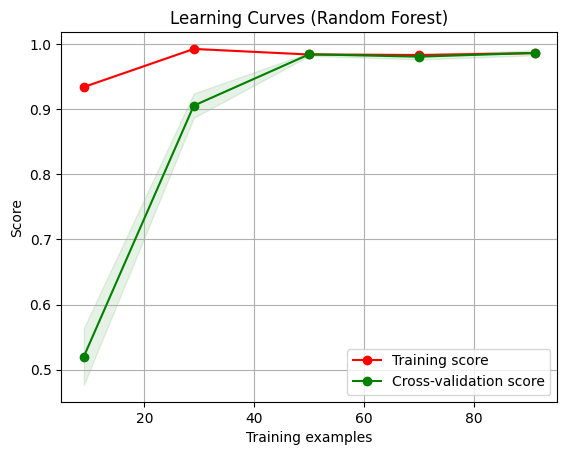

In [47]:
title = "Learning Curves (Random Forest)"
tscv = TimeSeriesSplit(n_splits=5)  # Number of cross-validation folds
plot_learning_curve(rf_regressor, title, X_train_encoded, y_train_subset, cv=tscv, n_jobs=4)
plt.show()


In [28]:
importances = rf_regressor.feature_importances_

In [29]:
# Get feature importances
importances = rf_regressor.feature_importances_

# If you have the list of column names (assuming you do for the encoded data), 
# you can map these importances to the respective column names to make the output more interpretable
feature_names = X_train_encoded.columns.tolist()  # Assuming X_train_encoded is a DataFrame

# Pairing the names with the importances and sort them
paired_importances = sorted(zip(importances, feature_names), reverse=True)

# Displaying the feature importances
for importance, name in paired_importances:
    print(f"{name}: {importance}")


distance_to_cbd: 0.5767331230861671
weekly_income: 0.16760999297160964
year: 0.05369612197008177
population: 0.044484362577563615
LGA_NAME_Bayside (Vic.): 0.038758430951512296
Nearest_station: 0.018560090825444207
Nearest_school: 0.01690200471743094
Nearest_shop: 0.015846776807616245
Offence Count: 0.0152156977997024
Nearest_supermarket: 0.011124704773181181
Nearest_hospital: 0.008783321386088127
Nearest_park: 0.008007600176673872
LGA_NAME_Yarra: 0.004121265735785922
beds: 0.0025724492661085645
LGA_NAME_Mount Alexander: 0.00256504089678775
LGA_NAME_Mansfield: 0.0024887157671129568
parkings: 0.0018351177674680971
baths: 0.0016590872443167464
LGA_NAME_Mornington Peninsula: 0.0011290880539890525
LGA_NAME_Towong: 0.0009037820009238453
LGA_NAME_Bass Coast: 0.0004503276057594094
LGA_NAME_East Gippsland: 0.00039598308722135636
LGA_NAME_Surf Coast: 0.0003013986495916873
LGA_NAME_Gannawarra: 0.0002921161979479181
LGA_NAME_Strathbogie: 0.00028999606253173336
LGA_NAME_Southern Grampians: 0.000283

# Prediction for Offence Count in future three years

In [30]:
train_df.head()

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,270,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000,2017,396,13113.0,592.342001
1,Ararat,260,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000,2017,1249,11613.0,579.692855
2,Ballarat,280,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000,2017,11885,152520.0,617.844766
3,Banyule,395,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140,2017,9703,129192.0,762.060273
4,Bass Coast,285,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675,2017,2613,34166.0,528.836271


In [32]:
from sklearn.ensemble import RandomForestRegressor


X_train_subset = train_df.drop(columns=['cost', 'Offence Count'])
y_train_subset = train_df['Offence Count']

X_test_subset = test_df.drop(columns=['cost', 'Offence Count'])
y_test_subset = test_df['Offence Count']

X_train_encoded = pd.get_dummies(X_train_subset, columns=['LGA_NAME'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_subset, columns=['LGA_NAME'], drop_first=True)

numerical_cols = ['Nearest_station', 'Nearest_park', 'Nearest_shop', 'Nearest_hospital', 'Nearest_school', 'Nearest_supermarket', 'distance_to_cbd', 'population', 'weekly_income']

for col in numerical_cols:
    X_train_encoded[col] = np.log1p(X_train_encoded[col])
    X_test_encoded[col] = np.log1p(X_test_encoded[col])

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the scaled data
rf_regressor.fit(X_train_encoded, y_train_subset)

# Predict on the scaled validation set
oc_preds = rf_regressor.predict(X_test_encoded)



# fill in the offence count data for future three years

In [33]:
test_df['Offence Count'] = oc_preds

In [34]:
train_df.head()

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,270,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000,2017,396,13113.0,592.342001
1,Ararat,260,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000,2017,1249,11613.0,579.692855
2,Ballarat,280,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000,2017,11885,152520.0,617.844766
3,Banyule,395,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140,2017,9703,129192.0,762.060273
4,Bass Coast,285,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675,2017,2613,34166.0,528.836271


In [35]:
test_df

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,NaN,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2024,494.82,13547.0,855.905888
1,Ararat,NaN,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2024,1425.13,11884.0,776.354437
2,Ballarat,NaN,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2024,10663.03,169198.0,853.239387
3,Banyule,NaN,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2024,7947.73,138961.0,1049.530159
4,Bass Coast,NaN,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2024,3010.08,39431.0,710.418329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Wodonga,NaN,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,3062.08,77804.0,961.461424
233,Wyndham,NaN,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,16824.66,778022.0,1027.621898
234,Yarra,NaN,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,12807.03,164835.0,1687.176131
235,Yarra Ranges,NaN,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,7455.14,171416.0,978.806597


# Prediction

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train = train_df.drop(columns=['cost'])
y_train = train_df['cost']

X_pred = test_df.drop(columns=['cost'])
y_pred = test_df['cost']

X_train_encoded = pd.get_dummies(X_train, columns=['LGA_NAME'], drop_first=True)
X_pred_encoded = pd.get_dummies(X_pred, columns=['LGA_NAME'], drop_first=True)

numerical_cols = ['Nearest_station', 'Nearest_park', 'Nearest_shop', 'Nearest_hospital', 'Nearest_school', 'Nearest_supermarket', 'distance_to_cbd', 'Offence Count', 'population', 'weekly_income']

for col in numerical_cols:
    X_train_encoded[col] = np.log1p(X_train_encoded[col])
    X_pred_encoded[col] = np.log1p(X_pred_encoded[col])

model = LinearRegression()

# Train the model
model.fit(X_train_encoded[selected_features], y_train)

# Predict on the validation set
val_preds = model.predict(X_pred_encoded[selected_features])



In [37]:
test_df['cost'] = val_preds

In [38]:
train_df.to_csv("../data/scoring/past_data.csv")
test_df.to_csv("../data/scoring/future_data.csv")

# Growth Rate

In [39]:
train_df.head()

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,270,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000,2017,396,13113.0,592.342001
1,Ararat,260,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000,2017,1249,11613.0,579.692855
2,Ballarat,280,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000,2017,11885,152520.0,617.844766
3,Banyule,395,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140,2017,9703,129192.0,762.060273
4,Bass Coast,285,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675,2017,2613,34166.0,528.836271


In [40]:
test_df.head()

,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
0,Alpine,423.877335,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000,2024,494.82,13547.0,855.905888
1,Ararat,392.328767,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000,2024,1425.13,11884.0,776.354437
2,Ballarat,429.353550,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000,2024,10663.03,169198.0,853.239387
3,Banyule,519.373359,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140,2024,7947.73,138961.0,1049.530159
4,Bass Coast,429.023916,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675,2024,3010.08,39431.0,710.418329


In [42]:
current_costs = train_df[train_df['year'] == 2023].set_index('LGA_NAME')['cost'].astype(float).to_dict()

predicted_costs = test_df[test_df['year'] == 2025].set_index('LGA_NAME')['cost'].astype(float).to_dict()

In [43]:
# Initialize a dictionary for growth rates
growth_rates = {}

# Calculate growth rate for each LGA_NAME23
for lga, cost_2023 in current_costs.items():
    # Ensure the LGA_NAME23 exists in both dictionaries before calculating
    if lga in predicted_costs:
        growth_rate = (predicted_costs[lga] - cost_2023) / cost_2023 * 100
        growth_rates[lga] = growth_rate

# Convert the growth_rates dictionary to a DataFrame
growth_df = pd.DataFrame(list(growth_rates.items()), columns=['LGA_NAME23', 'growth_rate'])

# Get top 10 LGA_NAME23 with the highest growth rate
top_10_lga = growth_df.nlargest(10, 'growth_rate')

print(top_10_lga)


            LGA_NAME23  growth_rate
57  Northern Grampians    89.624713
66              Towong    60.889520
10              Buloke    52.778781
0               Alpine    48.513948
70        West Wimmera    33.175160
63         Strathbogie    33.062787
61  Southern Grampians    21.172683
20          Gannawarra    18.417677
50           Moorabool    13.602755
59            Pyrenees    12.341980
